(val-sol-fact-notebook)=
# Valutare e rifinire la soluzione fattoriale 

In [1]:
source("_common.R")
library("lavaan")
library("hemp")

This is lavaan 0.6-15
lavaan is FREE software! Please report any bugs.



Loading required package: psych




Attaching package: ‘psych’




The following object is masked from ‘package:lavaan’:

    cor2cov




The following objects are masked from ‘package:scales’:

    alpha, rescale




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Loading required package: lattice



Loading required package: mirt



Loading required package: stats4



Loading required package: lme4



Loading required package: Matrix




Attaching package: ‘Matrix’




The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack





Attaching package: ‘lme4’




The following object is masked from ‘package:mirt’:

    fixef




Loading required package: reshape2




Attaching package: ‘reshape2’




The following object is masked from ‘package:tidyr’:

    smiths




Loading required package: boot




Attaching package: ‘boot’




The following object is masked from ‘package:lattice’:

    melanoma




The following object is masked from ‘package:psych’:

    logit




Loading required package: equate




Attaching package: ‘equate’




The following object is masked from ‘package:ggplot2’:

    margin




## Valutazione della matrice pattern

La maggior parte di strumenti usati nell'assessment psicologico e
neuropsicologico non valuta una singola dimensione psicologica, ma
piuttosto misura molteplici aspetti di un costrutto. Di conseguenza,
l'analisi fattoriale produce solitamente una soluzione a più 
fattori. Idealmente, dopo la rotazione, ciascun item saturerà fortemente
su un singolo fattore e debolmente sugli altri. In realtà, anche dopo la
rotazione degli assi fattoriali, spesso si presentano item che
saturano debolmente su tutti i fattori, oppure item che saturano
fortemente su più di un fattore.

Uno dei primi passi da compiere per  rifinire la soluzione
fattoriale è quello di valutare la matrice struttura e intervenire utilizzando il 
criterio della "struttura semplice", per poi valutare gli effetti delle
azioni intraprese (es., eliminazione di alcuni item) nella matrice pattern.
Ricordiamo che la matrice struttura contiene le correlazioni tra item
e fattori, mentre la matrice pattern contiene le saturazioni fattoriali.

### Item con basse saturazioni su tutti i fattori

Prima di procedere con l'analisi fattoriale è auspicabile esaminare la
matrice di correlazioni tra gli item ed eliminare quegli item che sono
insufficientemente correlati con gli altri item della matrice.
Tuttavia, anche dopo questo screening iniziale, è possibile che vi siano item
caratterizzati da saturazioni basse su tutti i fattori. Dal punto di vista pratico,
si considerano "basse" le saturazioni il cui valore assoluto è
minore di 0.30 (Hair et al., 1995). Hair e collaboratori suggeriscono
due soluzioni nel caso di item con  saturazioni basse su tutti i fattori:

- eliminare gli item con basse saturazioni, 
- valutare le comunalità degli item problematici e il contributo specifico che forniscono allo strumento. 

Se un item ha una bassa comunalità, o se il contributo di un item nei confronti del significato generale dello strumento è di poca importanza, allora l'item dovrebbe essere eliminato. Dopo l'eliminazione degli item critici, si procede calcolando una nuova soluzione fattoriale e si esaminano i risultati ottenuti.

Se vi sono degli item con basse saturazioni su tutti i fattori che però
contribuiscono in maniera importante a determinare il significato della
scala nel suo complesso, allora questi item dovrebbero essere mantenuti.
Alle volte, per tali item è possibile creare delle sottoscale separate
dalle altre.

### Item con saturazioni evevate su più di un fattore

È comune anche il caso opposto, ovvero quello nel quale ci sono item che saturano su fattori multipli (con saturazioni fattoriali $>$ .30), specialmente nel caso di soluzioni fattoriali ottenutie dopo una rotazione obliqua. Kline (2000) suggerisce di eliminare tali item in quanto rendono difficile da interpretare il significato della scala che così si ottiene. Hair e collaboratori (1995) ritengono invece che tali
item dovrebbero essere mantenuti, dato possono chiarire il significato dei
fattori che la scala identifica.

## Valutazione dell'attendibilità

All'interno del problema della costruzione di uno strumento vengono
esaminati tre aspetti dell'attendibilità: la consistenza interna, la
stabilità e l'equivalenza.

### Consistenza interna

#### La procedura split-half

La consistenza interna misura il grado di coerenza tra gli item che
costituiscono lo strumento o le sottoscale dello strumento. Se tutti gli
item che costituiscono uno strumento o una sua sottoscala misurano la
stessa cosa, allora saranno fortemente associati tra loro. 

È possibile misurare la consistenza interna con il metodo dello split-half, ovvero mediante la correlazione di Pearson tra i punteggi ottenuti
utilizzando ciascuna delle due metà degli item dello strumento. Usando
un software, è meglio trovare la media delle correlazioni inter-item
ricavabili a partire da tutte le possibili divisioni a metà dell'insieme
di item che costituiscono lo strumento. La correlazione trovata in
questo modo viene poi corretta utilizzando la formula "profetica" di
Spearman-Brown per tenere in considerazione il fatto che l'attendibilità
è stata calcolata utilizzando soltanto metà degli item dello strumento.

Si noti che la formula di Spearman-Brown è basata sull'assunzione che le
due metà dello strumento siano parallele, ovvero che abbiano identici
punteggi veri e uguali varianze d'errore (questa assunzione comporta la
conseguenza per cui le due metà degli item devono producono punteggi aventi la stessa media e la stessa varianza). Se queste assunzioni molto stringenti non vengono
soddisfatte, allora la procedura descritta sopra conduce ad una sovrastima dell'attendibilità quale consisenza interna della scala.

#### L'analisi della varianza

Se tutti gli item di uno strumento o di una sottoscala sono espressione
dello stesso costrutto, allora ci dobbiamo aspettare che anche le medie
dei punteggi sugli item siano uguali. Come è stato detto sopra, questa è
infatti una delle assunzioni delle forme strettamente parallele di un
test. È dunque possibile verificare questa assunzione mediante un'ANOVA
che sottopone a test l'ipotesi nulla dell'uguaglianza delle
medie di gruppi. Nel caso degli item di un test, dato che ciascun soggetto
completa tutti gli item che costituiscono lo strumento, è appropriato
usare un'ANOVA per misure ripetute che, nella sua declinazione più
moderna, corrisponde ad un modello multi-livello (*mixed-effect model*).

#### L'indice $\alpha$ di Cronbach

L'indice $\alpha$ di Cronbach è comunque la misura più utilizzata per valutare
l'attendibilità quale consistenza interna di uno strumento. L'$\alpha$
di Cronbach è stato interpretato come la proporzione di varianza della
scala che può essere attribuita al fattore comune (DeVellis, 1991). Può
anche essere interpretato come la correlazione stimata tra i punteggi
della scala e un'altro strumento della stessa lunghezza tratto
dall'universo degli item possibili che costituiscono il dominio del
costrutto (Kline, 1986). La radice quadrata del coefficiente $\alpha$ di
Cronbach rappresenta la correlazione stimata tra i punteggi ottenuti
tramite lo strumento e i punteggi veri (Nunnally & Bernstein, 1994).

In precedenza abbiamo descritto una serie di limiti del coefficiente $\alpha$ di Cronbach. In generale, molti ricercatori suggeriscono di usare al suo posto l'indice $\omega$ di McDonald.

### Stabilità temporale

La stabilità temporale viene valutata attraverso la procedura di
test-retest. La correlazione tra le misure ottenute in due momenti negli
stessi rispondenti ci fornisce l'attendibilità di test-retest.

Kline (2000) ha messo in evidenza come l'attendibilità di test-retest
sia influenzata da molteplici fattori, tra cui le caratteristiche del
campione, la maturità dei rispondenti, i cambiamenti nello stato
emozionale, le differenze nelle condizioni di somministrazione del test,
la possibilità di ricordare le risposte date in precedenza, la
difficoltà degli item, la grandezza del campione e le caratteristiche
del costrutto (ad esempio, stato vs. tratto).

Particolare attenzione deve essere rivolta all'intervallo temporale
usato nella procedura di test-retest. Se il periodo di tempo che
intercorre tra le due somministrazioni è troppo corto, i risultati
possono risultare distorti a causa del fatto che i soggetti si ricordano
le risposte date in precedenza. Questo può condurre ad una sovrastima
dell'attendibilità test-retest (Pedhazur & Schmelkin, 1991). Un
intervallo temporale troppo lungo tra le due somministrazioni ha invece
come limite il fatto che, in questo caso, vi è un'alta possibilità che
intervengano dei cambiamenti nei rispondenti rispetto al costrutto in
esame. Alla luce di queste considerazioni è stato suggerito di
utilizzare un intervallo temporale abbastanza breve, ovvero di una o due
settimane (Nunnally & Bernstein, 1994; Pedhazur & Schmelkin, 1991). Se è
necessario valutare la stabilità temporale nel corso di un lungo arco
temporale, Nunnally e Bernstein (1994) suggeriscono di utilizzare un
intervallo di sei mesi o maggiore.

### Equivalenza

Per cercare di evitare i problemi associati all'attendibilità quale
stabilità temporale, alcuni autori si sono posti il problema di
esaminare la correlazione tra forme parallele (o equivalenti) dello
strumento. La correlazione tra forme parallele di uno strumento va sotto
il nome di coefficiente di equivalenza e fornisce una misura alternativa
dell'attendibilità dello strumento (Burns & Grove, 2001; Pedhazur &
Schmelkin, 1991; Polit & Hungler, 1999).

Nunnally e Bernstein (1994) suggeriscono di confrontare i risultati
ottenuti con la somministrazione delle forme parallele lo stesso giorno
con quelli ottenuti nel caso di un intervallo temporale di due
settimane. Kline (2000) ritiene che l'attendibilità tra due forme
parallele debba essere di almeno 0.9 perché, per valori inferiori,
sarebbe difficile sostenere che le forme sono veramente parallele.

È tuttavia molto oneroso predisporre due forme parallele di uno
strumento. Per questa ragione, il coefficiente di equivalenza viene
raramente usato.

## Selezione di un sottoinsieme di item

Tipicamente, la costruzione di un test viene realizzata somministrando
un grande numero di item per poi selezionare gli item "migliori" che
andranno a fare parte del test vero e proprio. Si supponga di
somministrare inizialmente $m$ item, quando si desidera che il test
finale sia costituito da $p < m$ item. Un modo di affrontare questo
problema potrebbe essere quello di calcolare l'attendibilità del test
(coefficiente $\omega$) per tutti i possibili sottoinsiemi di $p$ item,
così da individuare il sottoinsieme migliore. Questo modo di procedere,
però, è problematico perché richiede la valutazione di un elevatissimo
numero di possibilità. Per esempio, da un insieme iniziale neanche
troppo numeroso di 100 item, il numero di sottoinsiemi di 20 item è
uguale a 

$$
\binom{100}{20} = 5.36 \times 10^{20}.
$$ 

È dunque necessario trovare metodi alternativi che evitino una tale esplosione combinatoria. A questo fine, ovvero per procedere alla selezione del sottoinsieme dei  "migliori" item, {cite:t}`mcdonald2013test` suggerisce di calcolare la *quantità di informazione* di ciascun item. La quantità di informazione di un item è definita come rapporto tra segnale/rumore, in relazione alla scomposizione della varianza dell'item:

$$
\frac{\lambda_i^2}{\psi_{ii}}.
$$ 

{cite:t}`mcdonald2013test` mostra come l'omissione di uno o più item produce sempre una riduzione dell'attendibilità del test (ovvero, una riduzione nel valore del coefficiente $\omega$). Tuttavia, tale riduzione è tanto più piccola quanto più piccola è la quantità di informazione degli item omessi. Il processo di selezione degli item può dunque essere guidato da un semplice principio:
si selezionano gli item aventi la quantità di informazione maggiore. Ovvero, in altre parole, si rimuovono gli item aventi la quantità di informazione più bassa.

**Esempio.** Per fare un esempio, consideriamo nuovamente la matrice di varianze e di covarianze della scala SWLS.

In [2]:
varnames <- c("Y1", "Y2", "Y3", "Y4", "Y5")
SWLS <- matrix(c(
  2.565, 1.424, 1.481, 1.328, 1.529,
  1.424, 2.493, 1.267, 1.051, 1.308,
  1.481, 1.267, 2.462, 1.093, 1.360,
  1.328, 1.051, 1.093, 2.769, 1.128,
  1.529, 1.308, 1.360, 1.128, 3.355
),
ncol = 5, byrow = TRUE,
dimnames = list(varnames, varnames)
)
SWLS

,Y1,Y2,Y3,Y4,Y5
Y1,2.565,1.424,1.481,1.328,1.529
Y2,1.424,2.493,1.267,1.051,1.308
Y3,1.481,1.267,2.462,1.093,1.360
Y4,1.328,1.051,1.093,2.769,1.128
Y5,1.529,1.308,1.360,1.128,3.355


Utilizzando la funzione `cfa()` contenuta nel pacchetto `lavaan`, il modello
ad un fattore viene definito nel modo seguente.

In [3]:
mod_1 <- "
  F =~ Y1 + Y2 + Y3 + Y4 + Y5
"

Otteniamo così una stima dei pesi fattoriali e delle unicità.

In [4]:
fit <- lavaan::cfa(
  mod_1,
  sample.cov = SWLS,
  sample.nobs = 215,
  std.lv = TRUE
)

Calcoliamo la quantità di informazione fornita da ciascun item. Iniziamo a estrarre dall'oggetto `fit` la matrice delle saturazioni fattoriali.

In [5]:
lambda <- inspect(fit, what="std")$lambda
lambda

,F
Y1,0.8166956
Y2,0.6941397
Y3,0.7257827
Y4,0.5905795
Y5,0.6429117


Estraiamo da `fit` le specificità.

In [6]:
theta <- diag(inspect(fit, what="std")$theta)
theta

Y1        Y2        Y3        Y4        Y5 
0.3330083 0.5181701 0.4732395 0.6512159 0.5866646

Possiamo ora calcolare quantità di informazione degli item facendo il rapporto tra ciascuna saturazione fattoriale innalzata al quadrato e la corrispondente specificità.

In [7]:
for (i in 1:5) {
  print(lambda[i]^2 / theta[i])
}

      Y1 
2.002928 
       Y2 
0.9298683 
      Y3 
1.113095 
       Y4 
0.5355891 
       Y5 
0.7045515 


Il risultato ottenuto indica che il quarto item è il meno informativo e che il
quinto item è il secondo meno informativo. Se un solo item deve essere
eliminato, dunque, elimineremo il quarto item. Se devono essere
eliminati due item, andranno eliminati il quarto e il quinto
item.


### Attendibilità e numero di item 

Di quanto cambia l'attendibilità di uno strumento se viene variato il
numero di item? Una risposta a questa domanda può essere fornita dalla
formula profetica di Spearman-Brown. Supponiamo che nella formula di
Spearman-Brown, 

$$
\begin{equation}
  \rho_p = \frac{p \rho_1}{(p-1)\rho_1 + 1},
\end{equation}
$$(eq-spearman-brown)
 
$\rho_1$ rappresenti l'attendibilità di un test costituito da un certo numero di item. Se poniamo $p=2$, la {eq}`eq-spearman-brown` ci fornisce una stima dell'attendibilità che si otterrebbe raddoppiando il numero di item nel test. Valori di $p$ minori di $1$, invece, vengono usati per predire la diminuizione dell'attendibilità conseguente ad una diminuzione nel numero degli item del test.

Ricordiamo però che le predizioni della formula di Spearman-Brown sono
accurate solo se la forma allungata o accorciata del test è parallela rispetto al
test considerato. Per esempio, se ad un test con un coefficiente di
attendibilità molto alto vengono aggiunti item aventi una bassa
attendibilità, allora l'attendibilità del test allungato sarà minore di
quella predetta dalla formula di Spearman-Brown.

Anche se la formula di Spearman-Brown ha un ruolo centrale nella teoria
classica dei test, si tenga conto che non rappresenta l'unico strumento
che può essere utilizzato per valutare la relazione tra attendibilità e numero degli item del test. La quantità detta *informazione dell'item* (*item information*), formulata dai modelli IRT, consente di predire i cambiamenti nella qualità della misura a seguito dell'aggiunta o della cancellazione di un sottoinsieme di item.

**Esempio.** Si consideri la scala SWLS. Chiediamoci come varia l'attendibilità della
scala se il numero di item aumenta da 5 a 20. Poniamo che l'attendibilità della
scala SWLS costituita da 5 item sia uguale a 0.824. Applicando la formula di
Spearman-Brown otteniamo la stima seguente.

In [8]:
(4 * 0.824) / ((4 - 1) * 0.824 + 1)

[1] 0.9493088

**Esempio.** Possiamo giungere al risultato precedente in un altro modo. Supponiamo che i 15 item aggiuntivi abbiano le stesse saturazioni fattoriali medie ($\bar{\lambda}$) e le stesse varianze specifiche medie ($\bar{\psi}$) rispetto agli item originali.
Mediante gli item di cui disponiamo, stimiamo l'attendibilità di un
"item medio" nel modo seguente

$$
\rho_1 = \frac{\bar{\lambda}^2}{\bar{\lambda}^2 + \bar{\psi}},
$$

ovvero otteniamo la stima di 0.48:

In [9]:
rho_1 <- mean(lambda)^2 / (mean(lambda)^2 + mean(theta)) 
rho_1

[1] 0.4845124

L'attendibilità predetta di un test costituito da 20 item sarà dunque
uguale a

In [10]:
(20 * rho_1) / ((20 - 1) * rho_1 + 1) 

[1] 0.9494904

il che replica il risultato ottenuto precedentemente.

**Esempio.** Un altro modo ancora per ottenere lo stesso risultato è quello di utilizzare 
un modello mono-fattoriale per item paralleli.

In [11]:
mod_2 <- "
  F =~ a*Y1 + a*Y2 + a*Y3 + a*Y4 + a*Y5
  Y1 ~~ b*Y1
  Y2 ~~ b*Y2
  Y3 ~~ b*Y3
  Y4 ~~ b*Y4
  Y5 ~~ b*Y5
"

Adattiamo il modello ai dati.

In [12]:
fit2 <- lavaan::cfa(
  mod_2,
  sample.cov = SWLS,
  sample.nobs = 215,
  std.lv = TRUE
)

Estraiamo dall'oggetto `fit2` le saturazioni fattoriali.

In [13]:
lambda <- inspect(fit2, what="std")$lambda
lambda

,F
Y1,0.6893938
Y2,0.6893938
Y3,0.6893938
Y4,0.6893938
Y5,0.6893938


Estraiamo da `fit2` le specificità.

In [14]:
theta <- diag(inspect(fit2, what="std")$theta)
theta

Y1        Y2        Y3        Y4        Y5 
0.5247361 0.5247361 0.5247361 0.5247361 0.5247361

Calcoliamo l'attendibilità dell'item "medio" usando $\lambda$ e $\psi$ (chiamato `theta` da `lavaan`).

In [15]:
rho_1 <- lambda[1]^2 / (lambda[1]^2 + theta[2])
rho_1 

Y2 
0.4752639

Posso ora applicare la formula di Spearman-Brown.

In [16]:
(20 * rho_1) / ((20 - 1) * rho_1 + 1) 

Y2 
0.9476834

Il risultato è praticamente identico a quelli trovati in precedenza.

### Numero di item e affidabilità

La formula di Spearman-Brown può anche essere riarrangiata in maniera tale da consentirci di predire il numero degli item necessari per raggiungere un determinato livello di affidabilità: 

$$
\begin{equation}
p = \frac{\rho_p (1-\rho_1)}{\rho_1(1-\rho_p)}, 
\end{equation}
$$(eq-s-b-inv)

dove $\rho_1$ è l'attendibilità stimata di un "item medio," $\rho_p$ è il livello desiderato di attendibilità del test allungato e $p$ è il numero di item del test allungato.

**Esempio.** L'attendibilità della scala SWLS costituita da 5 item è
$\omega = 0.824$. Quanti item devono essere aggiunti se si vuole
raggiungere un livello di attendibilità pari a $0.95$?

Ponendo $\rho_p = 0.95$ e $\rho_1= 0.479$, in base alla {eq}`eq-s-b-inv` si ottiene che

In [17]:
(.95 * (1 - rho_1)) / (rho_1 * (1 - .95))

Y2 
20.97779

il test dovrà essere costituito da 21 item.

## Analisi degli item

L'analisi degli item svolge un ruolo importante nello sviluppo e nella revisione dei test psicometrici. L'analisi degli item esamina le risposte fornite ai singoli item del
questionario allo scopo di valutare la qualità degli item e del
questionario nel suo complesso. Sotto al rubrica di analisi degli item
possiamo raggruppare le procedure che possono essere utilizzate per
descrivere la difficoltà degli item, le relazioni tra coppie di item, il
punteggio totale del test, le relazioni tra gli item e il punteggio
totale del test. Tali analisi statistiche vengono usate per la selezione
degli item al fine di costruire un questionario omogeneo, attendibile e
dotato di validità predittiva.

La selezione degli item di un test, però, non può essere svolta in maniera automatica usando soltanto criteri statistici quali quelli elencati sopra. La selezione degli item, invece, deve anche tenere includere considerazioni di ordine teorico basate sulla centralità degli item rispetto alla definizione del costrutto e considerazioni relative agli scopi della misurazione e al modo in cui l'item è stato formulato e costruito. Se alcuni aspetti di un costrutto non vengono rappresentanti da item che
soddisfano i criteri statistici descritti sopra, o se c'è un numero insufficiente
di item per produrre uno strumento attendibile, allora alcuni item
dovranno essere riscritti. Nella riformulazione degli item, risultano utili le
intuizioni che si sono guadagnate dalle analisi statistiche degli item che si sono dovuti scartare.

### Difficoltà degli item

Una statistica comune da calcolare durante l'analisi degli item è la proporzione di esaminandi che rispondono correttamente ad ogni item. Questa è nota come *difficoltà dell'item*, *p*. La proporzione $p_j$ di partecipanti che rispondono
correttamente all'item $j$-esimo, o proporzione di partecipanti che si dichiarano in accordo con l'affermazione espressa dall'item, se il test non è di prestazione, fornisce una stima del *livello di difficoltà* $\pi_j$ dell'item. 

In realtà, $p_j$ dovrebbe essere chiamato "facilità dell'item" in quanto assume il suo valore maggiore (ovvero $1$) quando tutti i rispondenti rispondono correttamente
all'item e il suo valore minimo (ovvero $0$) quando le risposte sono tutte sbagliate. Questo valore non va confuso con la difficoltà dell'item nella teoria della risposta agli item o con il valore-$p$ dei test di ipotesi frequentisti. 

I valori $p_j$ giocano un ruolo importante nelle procedure di selezione degli item. La difficoltà degli item deve essere interpretata in riferimento alla
probabilità di indovinare la risposta corretta. Si suppone, infatti, che
i rispondenti tirino ad indovinare quando non conoscono la risposta alla
domanda di un questionario. Nel caso di item dicotomici, per esempio, ci
possiamo aspettare un valore $p_j$ pari a $0.50$ sulla base del caso
soltanto; nel caso di item a risposta multipla con quattro opzioni di
scelta, invece, $p_j$ assume un valore pari a $0.25$ quando i
rispondenti tirano ad indovinare.

Se il test è composto per la maggior parte da item "facili", allora il
test non sarà in grado di discriminare tra rispondenti con diversi livelli di
abilità, in quanto quasi tutti i rispondenti saranno in grado di
fornire una risposta corretta alla maggioranza degli item. Lo stesso si
può dire per un test composto da item "difficili". Se il test è composto unicamente da item di difficoltà media, non potrà differenziare i rispondenti che hanno un grado di abilità media da quelli con abilità superiori alla media, dato che non ci sono item "difficili", e neppure da quelli con abilità inferiori alla media, dato
che non ci sono item "facili". 

In generale, dunque, è buona pratica costruire test composti da item che coprano
tutti i livelli di difficoltà. La scelta che viene usualmente fatta è
quella di una dispersione moderata e simmetrica del livello di
difficoltà attorno ad un valore leggermente superiore al valore che sta
a metà tra il livello del caso ($1.0$ diviso per il numero di
alternative) e il punteggio pieno ($1.0$). 

Per item che presentano cinque alternative di risposta, ad esempio, il livello del caso è pari a $1.0 / 5 = 0.20$. Il livello ottimale di difficoltà è uguale a 

$$
0.20 + (1.0 - 0.20) / 2 = 0.60.
$$ 
    
Per item dicotomici, il livello del caso è $1.0 / 2 = 0.50$ e il livello ottimale di difficoltà è uguale a 

$$
0.50 + (1.00 - 0.50) / 2 = 0.75.
$$ 

In generale, item con livelli di difficoltà superiore a $0.90$ o inferiore a $0.20$ dovrebbero essere utilizzati con cautela.

**Esempio.** Riporto qui sotto le proporzioni di risposte corrette (usando la correzione per il guessing) di 192 studenti di Psicometria nel primo parziale dell'AA 2021/2022. Il test aveva 16 item con 5 alternative di risposta ciascuno. Dunque la difficoltà media ottimale è pari a 0.6.

In [18]:
item_par_1 <- c(
  0.54255319, 0.76063830, 0.64361702, 0.65957447, 0.67021277, 0.12234043,
  0.14361702, 0.18085106, 0.76063830, 0.82978723, 0.81914894, 0.84042553,
  0.07978723, 0.07978723, 0.76063830, 0.79255319
)

Nel compito, la difficoltà media è risultata essere un po' inferiore.

In [19]:
mean(item_par_1) %>% 
  round(2)

[1] 0.54

La distribuzione dei livelli di difficoltà degli item suggerisce che forse alcuni item "difficili" si sarebbero potuti sostituire con item di difficoltà media.

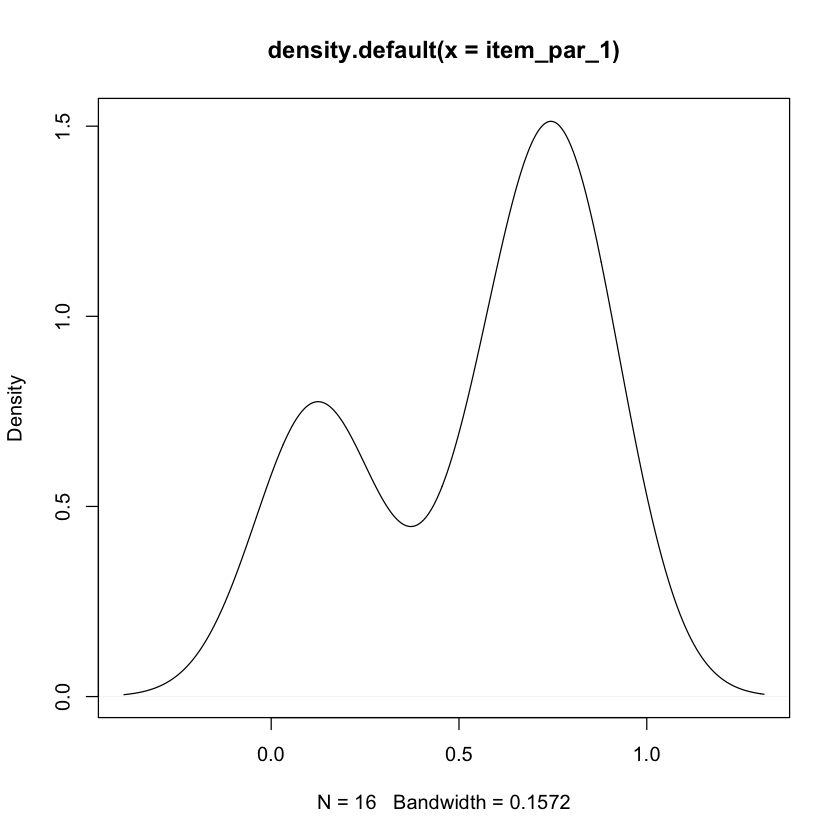

In [20]:
plot(density(item_par_1))

:::

Un altro esempio riguarda il data set `SAPA` del pacchetto `hemp`. Per questi dati possiamo utilizzare la funzione `colMeans` per calcolare la difficoltà degli item. Poiché abbiamo dei partecipanti che hanno risposte mancanti su alcuni item, dobbiamo passare l'argomento `na.rm = TRUE` per ignorare i dati mancanti. In caso contrario, la funzione `colMeans` restituirebbe `NA` per gli item che hanno almeno un valore mancante. Per rendere più leggibili i valori di difficoltà degli item, arrotondiamo a tre decimali utilizzando la funzione `round`.

In [21]:
item_diff <- colMeans(SAPA, na.rm = TRUE)
round(item_diff, 3)

reason.4 reason.16 reason.17 reason.19  letter.7 letter.33 letter.34 letter.58 
    0.640     0.698     0.697     0.615     0.600     0.571     0.613     0.444 
matrix.45 matrix.46 matrix.47 matrix.55  rotate.3  rotate.4  rotate.6  rotate.8 
    0.526     0.550     0.614     0.374     0.194     0.213     0.299     0.185

L'output mostra che gli item `reason.16` e `reason.17` ottengono i livelli di difficoltà  più alti, mentre `rotate.8` ha il livello di difficoltà più basso. Circa il 70% degli studenti è stato in grado di rispondere correttamente a `reason.16` e `reason.17`, mentre solo il 19% ha risposto correttamente a `rotate.8`.

### Correzione per guessing

Alle volte i valori $p_j$ sono calcolati introducendo una correzione per
le risposte fornite casualmente dai soggetti (*guessing*). Si consideri
un test a scelta multipla composto da item aventi ciascuno $C$
alternative di risposta ed una sola risposta corretta. Si supponga che
un rispondente risponda correttamente a $R$ item e risponda in maniera
sbagliata a $W$ item.

La correzione per guessing si ottiene applicando una formula basata sul
seguente ragionamento. Se assumiamo che un rispondente si limita a
tirare ad indovinare allora, ogni $C$ risposte, ci aspettiamo 1 risposta
giusta e $C-1$ risposte sbagliate. Per calcolare il punteggio totale del
test in modo da eliminare il numero di risposte corrette ottenute
tirando ad indovinare è necessario sottrarre 1 punto per ogni $C-1$ item
a cui è stata fornita una risposta corretta. Questo ragionamento conduce
alla seguente formula: 

$$
\begin{equation}
FS = R - \frac{W}{C - 1},
\end{equation}
$$(eq-guessing)

con $R$ = \# risposte corrette, $W$ = \# risposte
sbagliate, $C$ = \# alternative di risposta. Per esempio, se $C=5$,
allora è necessario sottrarre un punto ogni 4, il che è proprio quello
che fa la {eq}`eq-guessing`. 

La {eq}`eq-guessing` produce un punteggio totale corretto per il guessing identico a quello che si otterrebbe assegnando 1 punto a ciascuna risposta corretta e assegnando $- \frac{1}{C-1}$ punti alle risposte sbagliate; le risposte non date non vengono considerate.

La correzione per guessing rappresenta il tentativo di scomporre il
numero totale di risposte corrette in due componenti: le risposte
corrette dovute alle conoscenze del soggetto, le risposte che risultano
corrette come effetto del caso. La stessa formula può anche essere
utilizzata per calcolare la difficoltà degli item corretta per il guessing (come è stato fatto nell'esempio del parziale di Psicometria).

### Discriminatività

La discriminatività è una misura di quanto ogni item è in grado di
distinguere i soggetti con elevati livelli nel costrutto da quelli con
un livello basso. L'indice di discriminatività $D$ per i test di
prestazione massima si trova nel modo seguente. Dopo avere calcolato il
punteggio totale al test, si dividono i soggetti in due gruppi: soggetti
con basso punteggio e soggetti con alto punteggio. Una volta definiti i
due gruppi, l'indice di discriminatività $D$ sarà dato da:

$$D = P(\text{alto}) - P(\text{basso}),$$ 

dove $P(\text{alto}$ è la proporzione di soggetti che ha risposto correttamente all'item nel gruppo con punteggi alti e $P(\text{basso}$ è la proporzione di soggetti
che ha risposto correttamente all'item nel gruppo con punteggi bassi. Il
valore di $D$ può variare da -1 a +1. Nella tabella seguente sono fornite le linee guida per l'interpretazione di questo indice (Ebel, 1965).

  | Valore di $D$       |   Commento |
  | ------------------- | ------------------------------------------ |
  | $D \geq 0.40$        |  Ottima, nessuna revisione |
  | $0.30 \leq D < 0.40$ |  Buona, revisioni minime |
  | $0.20 \leq D < 0.30$ |  Sufficiente, revisioni parziali |
  | $D < 0.20$           |  Insufficiente, riformulazione o eliminazione |

La discriminatività degli item di tipo Likert viene valutata con la
medesima procedura degli item dei testi di prestazione massima, anche se
cambiano le procedure statistiche da utilizzare. Si può dividere la
distribuzione dei punteggi totali (o punteggi medi) in quartili e
confrontare il punteggio medio o mediano del quartile superiore con
quello del quartile inferiore, oppure, se il test è orientato al
criterio e lo scopo è selezionare gli item che discriminano meglio due
gruppi precostituiti di soggetto, eseguire i medesimi confronti tra il
gruppo target (ad esempio, pazienti) e quello "di controllo" (per
esempio, popolazione generale). 

È consigliabile valutare la dimensione dell'effetto, ad esempio attraverso l'indice $d$ di Cohen. La dimensione dell'effetto dovrebbe essere almeno moderata ($d > |0.50|$).

**Esempio.** Per il primo parziale di Psicometria AA 2021/2022, l'indice $d$ di Cohen calcolato sulla proporzione di risposte corrette per il gruppo di studenti con i punteggi più bassi (primo quartile) e il gruppo di studenti con i punteggi più alti (ultimo quartile) è stato di 4.76, 95% CI [4.0, 5.51]. L'indice *complessivo* di discriminatività sembra dunque adeguato. Sarebbe però necessario calcolare questo indice item per item.

### Potere discriminante dell'item e analisi fattoriale

Un'altra statistica ampiamente utilizzata nell'analisi degli item è il potere discriminante degli item, che si riferisce alla capacità dell'item nel distinguere gli esaminandi con una alta abilità da quelli con una bassa abilità. Sebbene esistano molti modi per calcolare la discriminazione degli item, la forma più comune è la correlazione punto-biseriale tra le risposte degli esaminandi all'item e il loro punteggio totale nel test. Valori grandi e positivi indicano una forte relazione tra il rispondere correttamente all'item e avere un punteggio alto nel test, mentre valori vicini allo zero indicano nessuna relazione e valori negativi indicano che il rispondere correttamente all'item è associato a un punteggio complessivo del test più basso. Valori vicini allo zero o negativi suggeriscono che l'item potrebbe non funzionare correttamente. Alcune delle ragioni per ottenere una discriminazione degli item bassa o negativa potrebbero essere l'utilizzo di una chiave di risposta errata per l'item o l'assenza di risposte corrette. Indipendentemente dalla causa, gli item con correlazioni punto-biseriale basse o negative devono essere modificati, se il test/strumento è in fase di revisione, o rimossi dal test e dal punteggio.

Per calcolare il potere discriminante dell'item per i dati SAPA, prima calcoliamo il punteggio totale del test utilizzando la funzione `rowSums` insieme all'opzione `na.rm = TRUE` e lo salviamo come `total_score`. Successivamente, correlaziamo gli item in SAPA con il punteggio totale del test utilizzando la funzione `cor`. Specificamente, usiamo l'argomento `use = "pairwise.complete.obs"` nella funzione `cor` a causa della presenza di risposte mancanti. Infine, salviamo la matrice di correlazione come `item_discr` e la stampiamo.

In [22]:
total_score <- rowSums(SAPA, na.rm = TRUE)
item_discr <- cor(SAPA, total_score, use = "pairwise.complete.obs")
round(item_discr, 2)

reason.4,0.59
reason.16,0.53
reason.17,0.59
reason.19,0.56
letter.7,0.58
letter.33,0.56
letter.34,0.59
letter.58,0.58
matrix.45,0.51
matrix.46,0.51
matrix.47,0.55


I risultati mostrano che tutti gli item del test SAPA sono moderatamente e positivamente correlati con il punteggio totale del test. Questo indica che tutti gli item funzionano correttamente e non fornisce informazioni salienti su quali item rimuovere o modificare.

Un altro modo per calcolare il potere discriminante degli item consiste nel dividere i candidati in due gruppi (ad esempio, 1 = alto rendimento e 0 = basso rendimento) in base ai loro punteggi totali nel test e correlare questa variabile di raggruppamento con le risposte agli item. Questo è noto come *indice di discriminazione degli item*. Un'opzione per creare gruppi di alto e basso rendimento è selezionare il 25% più alto e il 25% più basso dei candidati in base ai loro punteggi totali nel test. Va notato che la decisione di utilizzare il 25% è arbitraria. Potremmo utilizzare un altro valore (ad esempio, il 10% o il 20%) per definire i gruppi di alto e basso rendimento. Dopo aver definito il punto di cut-off per i gruppi, calcoliamo la proporzione di candidati che hanno risposto correttamente all'elemento nei gruppi di alto e basso rendimento.

Nell'esempio seguente, calcoliamo l'indice di discriminazione dell'elemento `reason.4` nel set di dati SAPA utilizzando la funzione `idi` del pacchetto `hemp`. Per specificare i gruppi di alto e basso rendimento, utilizziamo il valore `perc_cut = .25` nella funzione `idi`.

In [23]:
idi(SAPA, SAPA$reason.4, perc_cut = .25)

Upper 25% Lower 25% 
 0.805136  0.194864

Abbiamo scoperto che l'81% dei candidati nel gruppo di alto rendimento ha risposto correttamente all'item `reason.4`, mentre solo il 19% dei candidati nel gruppo di basso rendimento ha risposto correttamente. Questo suggerisce che l'item era più facile per i candidati di alto rendimento e più difficile per quelli di basso rendimento. Pertanto, possiamo dire che questo particolare item risulta utile per differenziare i due gruppi, ma non necessariamente all'interno di ciascun gruppo.

Secondo McDondald (1999), la nozione di potere discriminante dell'item
può essere trattata in maniera più precisa nell'ambito del modello
monofattoriale. Se l'insieme di item a disposizione non è eccessivamente
grande (200 o meno), infatti, è possibile procedere alla selezione degli
item migliori tramite l'analisi fattoriale -- ovvero, scegliendo gli
item con le saturazioni maggiori.

**Esempio.** Per il primo parziale di Psicometria AA 2021/2022 si ottiene la seguente soluzione fattoriale a due fattori. Questa soluzione sembra suggerire che gli item 1 e 5 forse andrebbero sostituiti, mentre gli altri item sembrano adeguati.

In [24]:
faT1 <- fa(r=cormat, nfactors=2, n.obs=192, rotate="oblimin")
faT1$loadings

Loadings:
    MR1    MR2   
i1   0.132       
i2   0.270  0.107
i3   0.489       
i4   0.343  0.365
i5   0.130  0.105
i6   0.565 -0.497
i7   0.527       
i8          0.792
i9   0.363       
i10  0.467  0.250
i11  0.459  0.190
i12  0.111  0.497
i13  0.401       
i14  0.511  0.173
i15  0.206  0.252
i16  0.247  0.365

ERROR: Error in parse(text = x, srcfile = src): <text>:5:12: unexpected symbol
4: Loadings:
5:     MR1    MR2
              ^


### Punteggio sull'item e punteggio totale

Il grado di associazione tra il punteggio sull'item e il punteggio
totale viene considerato dalla teoria classica dei test come un indice che descrive il potere discriminante dell'item. Se il test fornisce una misura
attendibile di un unico attributo, e se un item è fortemente associato
al punteggio del test, allora l'item sarà in grado di
distinguere tra rispondenti che ottengono un punteggio basso nel test e
rispondenti che ottengono un punteggio alto nel test.

Nel caso di una forte associazione positiva tra il punteggio sull'item e
il punteggio totale, la probabilità di risposta corretta sull'item è
alta per rispondenti che ottengono un punteggio totale alto, e bassa per
i rispondenti che ottengono un punteggio totale basso. Nel caso di una
debole associazione tra il punteggio sull'item e il punteggio totale,
invece, la probabilità di risposta corretta all'item non è predittiva
del punteggio totale. Gli item con un basso potere discriminante
dovrebbero dunque essere rimossi dal reattivo.

È necessario distinguere i casi in cui gli item sono dicotomici dal caso
di item continui. Nel caso di item dicotomici e di un test
unidimensionale, il potere discriminante viene calcolato mediante la
correlazione biseriale o punto-biseriale.

### Relazioni tra coppie di item

Le relazioni tra coppie di item sono importanti sia per la costruzione
sia per la validazione dei test psicometrici. La teoria classica dei test definisce
l'attendibilità di un test (o di un item) come il rapporto tra la
varianza del punteggio vero e la varianza del punteggio osservato. Il
coefficiente di attendibilità può però essere calcolato anche trovando
la correlazione tra due forme parallele di un test (o tra due item).
Inoltre, è possibile interpretare la correlazione tra due forme
parallele di un test (o tra due item) come il quadrato del coefficiente
di correlazione tra i punteggi osservati e i punteggi veri di un test (o
di un item).

Molti indici sono disponibili per misurare il grado di associazione tra item. Per item quantitativi, possiamo usare la correlazione di Pearson o la covarianza. Per item qualitativi politomici ordinali, usiamo la correlazione policorica. Per item ordinali dicotomici, usiamo la correlazione tetracorica. Per item dicotomici usiamo, ad esempio, l'indice $\phi$.

### Ridondanza

Nel processo di raffinamento del test occorre anche tenere conto degli item
ridondanti, ossia degli item che sono troppo associati tra loro. La
ridondanza può essere valutata con indici statistici quali la
correlazione: se due o più item hanno tra loro una correlazione maggiore
di $|0.70|$ viene mantenuto nell'item pool solo uno di essi, dato che gli
altri item forniscono la stessa informazione.

### Massimizzazione della varianza del punteggio totale

Uno dei criteri che possono essere utilizzati per la selezionare degli item
che andranno a costituire la versione finale di un test è la massimizzazione della varianza del punteggio totale. Più in particolare, si vuole massimizzare il rapporto tra la varianza del punteggio totale e la somma delle varianze dei punteggi dei $p$ item. Dato che il coefficiente $\alpha$ di Cronbach ha la seguente forma:

$$\alpha = \frac{p}{p-1}\left[1- \frac{\sum \sigma^2_{Y_i}}{\sigma^2_T} \right],$$

la scelta di massimizzare il rapporto definito in precedenza avrà anche
la conseguenza di massimizzare $\alpha$.

{cite:t}`mcdonald2013test` fa notare che una procedura di selezione degli item
basata sul principio della massimizzazione di $\alpha$ ha però dei
limiti. In primo luogo, tale procedura è appropriata solo quando
l'insieme di item è troppo grande per selezionare gli item in base
all'esame delle saturazioni fattoriali ottenute applicando il modello
mono-fattoriale. In secondo luogo, {cite:t}`mcdonald2013test` nota che la procedura di selezione basata sulla massimizzazione di $\alpha$ è adeguata solo nel caso di una struttura mono-fattoriale. La selezione degli item basata sulla massimizzazione di $\alpha$  deve dunque essere accompagnata da considerazione relative al contenuto e alla struttura del costrutto.







### Indice di affidabilità dell'item

Oltre agli indici di difficoltà e discriminazione degli elementi, un'altra statistica utile per l'analisi degli elementi è l'indice di affidabilità dell'elemento. L'indice di affidabilità dell'elemento (IRI) è definito come:

$$
IRI = S_i \cdot r_{i,tt},
$$

dove $S_i$ è la deviazione standard dell'item $i$ e $r_{i,tt}$ è la correlazione tra l'item $i$ e il punteggio totale del test. L'IRI può teoricamente variare tra -0.5 e 0.5, con valori grandi e positivi indicativi di alta affidabilità. 

Di seguito calcoliamo l'IRI per tutti gli item nel set di dati SAPA. Possiamo farlo utilizzando la funzione `iri` in `hemp`.

In [ ]:
iri(SAPA)

I risultati restituiti dalla funzione `iri` mostrano che l'IRI varia da circa 0.19 a 0.29 per il set di dati SAPA. Tutti questi sono valori ragionevoli per l'IRI (ovvero nessuno è negativo o vicino allo zero).

### Indice di validità dell'item

Quando invece del punteggio totale del test viene utilizzato un criterio esterno, questo indice è noto come *indice di validità dell'item* (IVI). L'IVI può variare anche tra -0.5 e 0.5, con valori elevati (in valore assoluto) che indicano una validità maggiore. Valori negativi elevati indicano una maggiore validità quando ci si aspetta che gli elementi siano correlati in modo negativo con il criterio.

Nell'esempio seguente, utilizziamo la funzione `ivi` in `hemp` con "reason.17" come criterio esterno e "reason.4" come elemento di interesse e troviamo che l'IVI è 0.19.

In [ ]:
ivi(item = SAPA$reason.4, crit = SAPA$reason.17)

### Distrattori

Un altro aspetto importante degli elementi che deve essere analizzato sono le opzioni di risposta. Nel contesto dei test a scelta multipla, le opzioni di risposta alternative (cioè sbagliate) vengono definite "distrattori". I distrattori svolgono un ruolo importante in un elemento a scelta multipla. Per garantire elementi a scelta multipla di alta qualità, è cruciale includere distrattori plausibili e ben funzionanti che siano più probabili di attirare i candidati con conoscenze parziali. I distrattori non plausibili potrebbero dover essere riscritti o sostituiti con un distrattore migliore. La qualità dei distrattori viene tipicamente valutata attraverso l'analisi dei distrattori. L'analisi dei distrattori viene spesso condotta osservando la proporzione di candidati che scelgono un distrattore particolare.

Per illustrare l'analisi dei distrattori, utilizziamo gli item del data set `multiplechoice` in `hemp`. Si tratta di un ipotetico test a scelta multipla composto da 27 item somministrati a 496 candidati. Le quattro opzioni di risposta sono codificate come 1, 2, 3 e 4 nel data set. Utilizziamo la funzione `distract` in `hemp` per calcolare la proporzione di candidati che selezionano ciascun distrattore. 

In [ ]:
distractors <- distract(multiplechoice)
head(distractors)

Nella tabella sopra, vediamo che molti item avevano distrattori selezionati circa il 5% delle volte o meno. Questi distrattori potrebbero essere candidati per una revisione in quanto sono stati approvati ad un livello così basso da suggerire che la maggior parte degli esaminandi non li ha considerati come opzioni plausibili. Per l'item 1, i distrattori funzionavano tutti più o meno allo stesso modo (ovvero circa il 5% delle volte ogniuno è stato approvato), suggerendo che funzionavano tutti bene rispetto l'uno all'altro, ma che l'item era troppo facile (la risposta corretta era l'opzione 4, selezionata dall'84.5% degli esaminandi). Al contrario, l'item 5 era un item più difficile, con la risposta corretta che ancora una volta era l'opzione 4. Le opzioni 1 e 2 erano molto probabilmente fraintendimenti, mentre l'opzione 3 potrebbe essere rivista o potenzialmente eliminata da questo item a causa del basso tasso di approvazione (solo il 4.2%). Dato l'approvazione molto alta dell'opzione 1 (35.1%), è molto probabile che anche questa opzione fosse corretta. Per ottenere una visione più completa del funzionamento dell'item, sarebbe consigliabile calcolare l'indice di discriminazione specifico per quell'item. Questo ci permetterebbe di ottenere ulteriori informazioni sulla capacità dell'item di distinguere tra candidati di alto e basso livello.

